In [ ]:
!gdown --folder https://drive.google.com/drive/folders/1CAbb3DjrOPBNm0ozVBfhvrEh9P9rAppc

Retrieving folder contents
Processing file 1e_G-9a66AryHxBOwGWhriePYCCa4_29e subtaskA_dev_monolingual.jsonl
Processing file 123UQ92LxtHaVTbNYlmjnG1CWwD-x7wDL subtaskA_dev_multilingual.jsonl
Processing file 1HeCgnLuDoUHhP-2OsTSSC3FXRLVoI6OG subtaskA_train_monolingual.jsonl
Processing file 13-9-DakCeLFbPgCiVIU0v6_BCQx0ppz6 subtaskA_train_multilingual.jsonl
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1e_G-9a66AryHxBOwGWhriePYCCa4_29e
To: /content/SubtaskA/subtaskA_dev_monolingual.jsonl
100% 10.8M/10.8M [00:00<00:00, 25.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=123UQ92LxtHaVTbNYlmjnG1CWwD-x7wDL
To: /content/SubtaskA/subtaskA_dev_multilingual.jsonl
100% 21.2M/21.2M [00:00<00:00, 60.9MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1HeCgnLuDoUHhP-2OsTSSC3FXRLVoI6OG
From (redirected): https://drive.google.com/uc?id=1HeCgnLuDoUHhP-2OsTSSC3FXRLVoI

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
from datasets import load_dataset

# Assuming the files are in the 'data' directory and named appropriately
train_file = '/content/SubtaskA/subtaskA_train_monolingual.jsonl'
test_file = '/content/SubtaskA/subtaskA_dev_monolingual.jsonl'

dataset = load_dataset('json', data_files={'train': train_file, 'test': test_file})


Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
from transformers import RobertaTokenizer

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

Map:   0%|          | 0/119757 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

In [ ]:
tokenized_datasets.save_to_disk("./tokenized_datasets")

Saving the dataset (0/2 shards):   0%|          | 0/119757 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/5000 [00:00<?, ? examples/s]

In [ ]:
import zipfile

zip_file_name = "tokenized_datasets.zip"

with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    # Extract all the contents of the zip file to the current directory
    zip_ref.extractall()

In [ ]:
from datasets import load_from_disk

tokenized_datasets = load_from_disk("./tokenized_datasets")

In [ ]:
!pip install accelerate -U

In [ ]:
!zip -r tokenized_datasets.zip tokenized_datasets
from google.colab import files
files.download("/content/tokenized_datasets.zip")

  adding: tokenized_datasets/ (stored 0%)
  adding: tokenized_datasets/test/ (stored 0%)
  adding: tokenized_datasets/test/dataset_info.json (deflated 70%)
  adding: tokenized_datasets/test/state.json (deflated 37%)
  adding: tokenized_datasets/test/data-00000-of-00001.arrow (deflated 73%)
  adding: tokenized_datasets/train/ (stored 0%)
  adding: tokenized_datasets/train/dataset_info.json (deflated 70%)
  adding: tokenized_datasets/train/state.json (deflated 47%)
  adding: tokenized_datasets/train/data-00001-of-00002.arrow (deflated 68%)
  adding: tokenized_datasets/train/data-00000-of-00002.arrow (deflated 75%)
  adding: tokenized_datasets/dataset_dict.json (stored 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from transformers import RobertaForSequenceClassification, Trainer, TrainingArguments

model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=2)

training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=1,              # number of training epochs
    per_device_train_batch_size=16,   # batch size for training
    per_device_eval_batch_size=32,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=100,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['test'],
)

trainer.train()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
100,0.594900
200,0.137000
300,0.115200
400,0.086300
500,0.145300
600,0.130400
700,0.108200
800,0.102400
900,0.080900
1000,0.049700


TrainOutput(global_step=7485, training_loss=0.043359151215814476, metrics={'train_runtime': 12321.4129, 'train_samples_per_second': 9.719, 'train_steps_per_second': 0.607, 'total_flos': 3.150939065674752e+16, 'train_loss': 0.043359151215814476, 'epoch': 1.0})

In [ ]:
model.save_pretrained('/content/drive/MyDrive/DeepLearning/Project/RoBERTa')
#tokenizer.save_pretrained('./fine_tuned_roberta')


In [ ]:
!zip -r fine_tuned_roberta.zip fine_tuned_roberta
from google.colab import files
files.download("/content/fine_tuned_roberta.zip")

In [ ]:
results = trainer.evaluate()
print(results)


{'eval_loss': 2.0707738399505615, 'eval_runtime': 174.381, 'eval_samples_per_second': 28.673, 'eval_steps_per_second': 0.9, 'epoch': 1.0}


In [ ]:
# Import necessary libraries
from google.colab import drive

# Specify the source and destination paths
source_path = '/content/results'
destination_path = '/content/drive/MyDrive/DeepLearning/Project/RoBERTa'

# Copy the folder
!cp -r {source_path} {destination_path}

^C


In [ ]:
!zip -r results.zip results
from google.colab import files
files.download("/content/results.zip")

#Test

In [ ]:
from transformers import RobertaForSequenceClassification, RobertaTokenizer

# Load the fine-tuned model and tokenizer
model_path = '/content/drive/MyDrive/DeepLearning/Project/RoBERTa'
model = RobertaForSequenceClassification.from_pretrained(model_path)
#tokenizer = RobertaTokenizer.from_pretrained(model_path)
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [ ]:
# Load the dataset
dev_dataset = load_dataset('json', data_files={'test': '/content/SubtaskA/subtaskA_dev_monolingual.jsonl'})

# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True)

tokenized_dev_dataset = dev_dataset.map(tokenize_function, batched=True)

Generating test split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

In [ ]:
import torch
from torch.utils.data import DataLoader

# Assuming that the tokenized_dev_dataset['test'] is your development set
dev_encodings = tokenizer(tokenized_dev_dataset['test']['text'], truncation=True, padding=True, max_length=512)
dev_labels = tokenized_dev_dataset['test']['label']

# Create a torch dataset
class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

dev_dataset = Dataset(dev_encodings, dev_labels)
dev_loader = DataLoader(dev_dataset, batch_size=16, shuffle=False)


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

model.eval()  # Set model to evaluation mode
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

true_labels = []
pred_labels = []

with torch.no_grad():
    for batch in dev_loader:
        inputs = {k: v.to(device) for k, v in batch.items() if k != 'labels'}
        labels = batch['labels'].to(device)
        outputs = model(**inputs)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1)
        pred_labels.extend(predictions.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Calculate metrics
accuracy = accuracy_score(true_labels, pred_labels)
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, pred_labels, average='binary')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Accuracy: 0.712
Precision: 0.9880294659300184
Recall: 0.4292
F1-Score: 0.5984383714445064


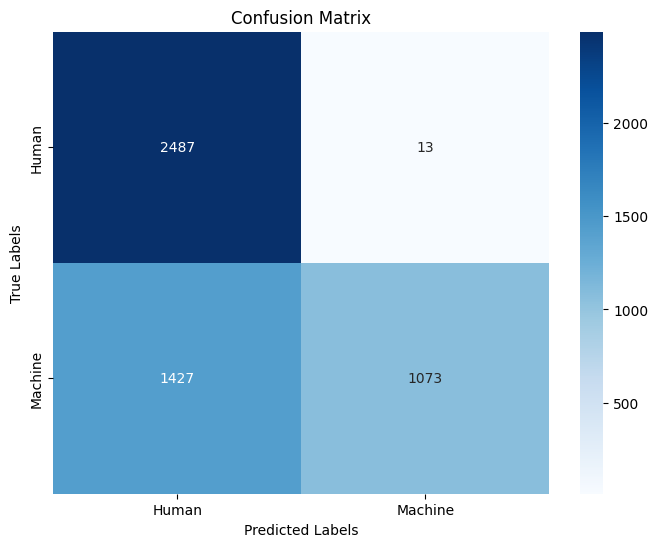

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns  # For a nicer confusion matrix visualization

cm = confusion_matrix(true_labels, pred_labels)

# Set the figure size
plt.figure(figsize=(8, 6))

# Use seaborn to create a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Human', 'Machine'], yticklabels=['Human', 'Machine'])

# Add labels and title for clarity
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix')
plt.show()


Testing different word limits

In [ ]:
from transformers import RobertaForSequenceClassification, RobertaTokenizer
from datasets import load_dataset
import torch
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the fine-tuned model and tokenizer
model_path = '/content/drive/MyDrive/DeepLearning/Project/RoBERTa'
model = RobertaForSequenceClassification.from_pretrained(model_path)
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [ ]:
# Set model to evaluation mode and move to GPU if available
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

In [ ]:
def evaluate_model(max_length):
    # Load the dataset
    test_dataset = load_dataset('json', data_files={'test': '/content/SubtaskA/subtaskA_dev_monolingual.jsonl'})

    # Tokenize the dataset with variable max_length
    tokenized_dataset = test_dataset.map(lambda examples: tokenizer(examples['text'], truncation=True, padding="max_length", max_length=max_length), batched=True)

    # Dataset class for DataLoader
    class TextDataset(Dataset):
        def __init__(self, encodings):
            self.encodings = encodings

        def __getitem__(self, idx):
            item = {key: torch.tensor(val[idx]) for key, val in self.encodings.to_dict().items() if key != 'labels'}
            item['labels'] = torch.tensor(self.encodings['label'][idx])
            return item

        def __len__(self):
            return len(self.encodings['label'])

    # Create DataLoader
    test_dataset = TextDataset(tokenized_dataset['test'])
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    true_labels, pred_labels = [], []
    with torch.no_grad():
        for batch in test_loader:
            inputs = {k: v.to(device) for k, v in batch.items() if k != 'labels'}
            labels = batch['labels'].to(device)
            outputs = model(**inputs)
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=-1)
            pred_labels.extend(predictions.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    # Calculate metrics
    accuracy = accuracy_score(true_labels, pred_labels)
    precision, recall, f1, _ = precision_recall_fscore_support(true_labels, pred_labels, average='binary')

    # Print metrics
    print(f"Metrics for max_length={max_length}: Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

    # Plot the confusion matrix
    cm = confusion_matrix(true_labels, pred_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Human', 'Machine'], yticklabels=['Human', 'Machine'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix for max_length={max_length}')
    plt.show()


In [ ]:
for length in [10, 20, 50, 100, 200, 500]:
    evaluate_model(length)


TypeError: RobertaForSequenceClassification.forward() got an unexpected keyword argument 'label'

Test different word limits part 2

In [ ]:
from datasets import load_dataset
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
import torch
from torch.utils.data import DataLoader

In [ ]:
# Define the tokenizer and model path
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model_path = '/content/drive/MyDrive/DeepLearning/Project/RoBERTa'
model = RobertaForSequenceClassification.from_pretrained(model_path)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
# Load the development dataset
dev_file = '/content/SubtaskA/subtaskA_dev_monolingual.jsonl'
dev_dataset = load_dataset('json', data_files={'test': dev_file})

Token Limit: 10 - Accuracy: 0.5672, Precision: 0.6135135135135135, Recall: 0.3632, F1 Score: 0.4562814070351759


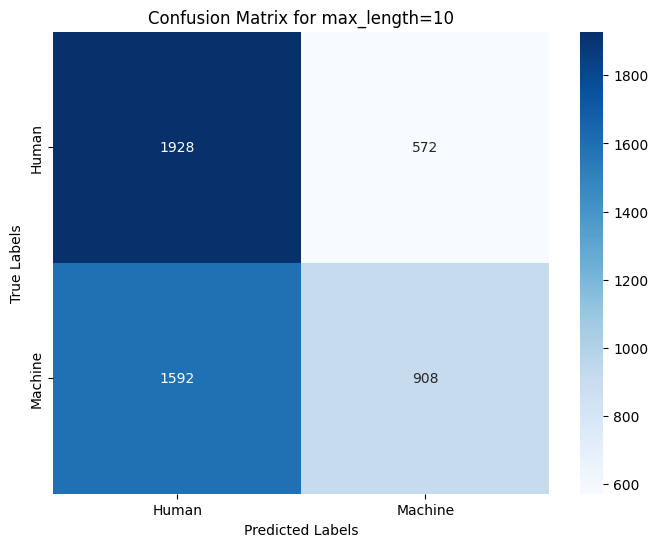

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Token Limit: 20 - Accuracy: 0.584, Precision: 0.6223776223776224, Recall: 0.4272, F1 Score: 0.5066413662239089


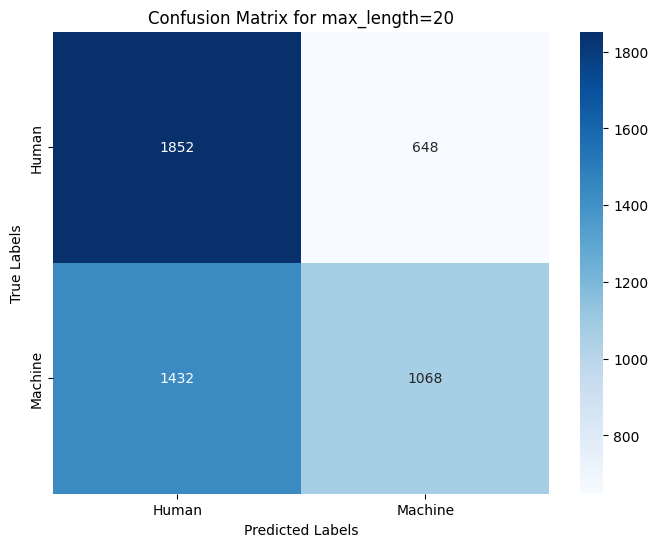

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Token Limit: 50 - Accuracy: 0.6018, Precision: 0.6778476589797344, Recall: 0.388, F1 Score: 0.493513100992114


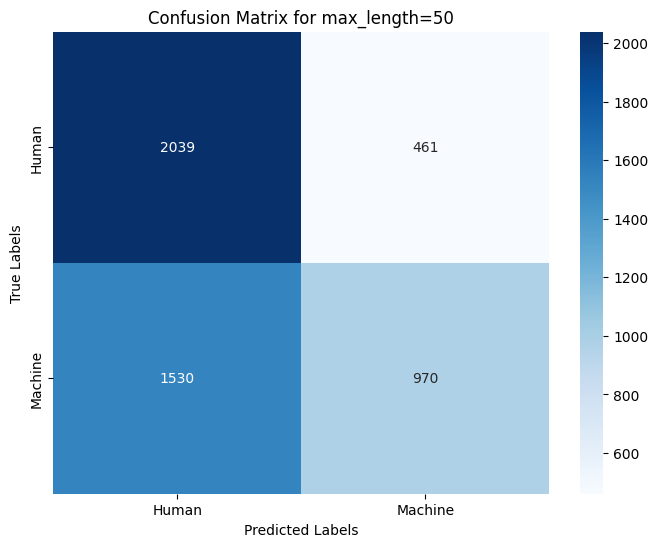

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Token Limit: 100 - Accuracy: 0.6674, Precision: 0.8236658932714617, Recall: 0.426, F1 Score: 0.5615607698391774


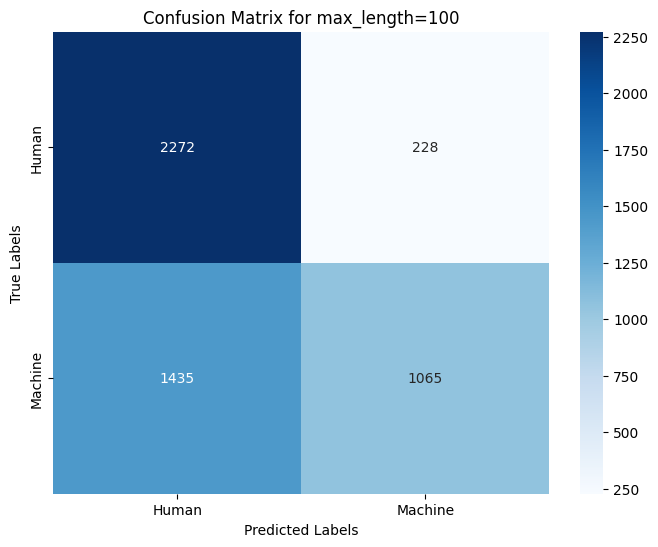

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Token Limit: 200 - Accuracy: 0.7042, Precision: 0.9397071490094746, Recall: 0.4364, F1 Score: 0.59601201857416


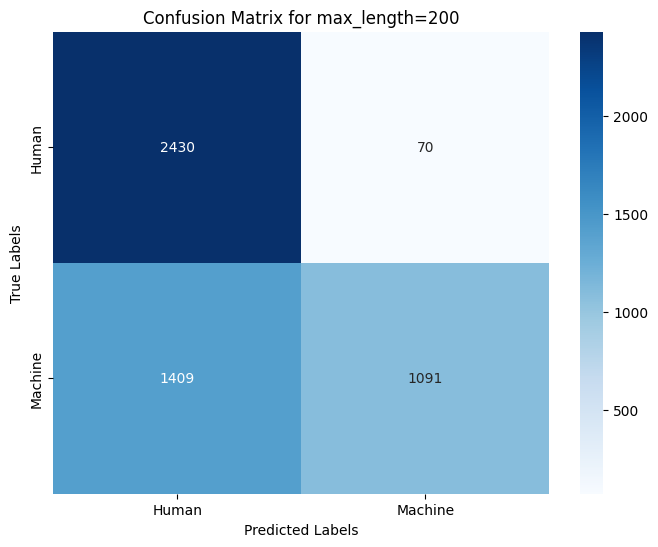

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Token Limit: 500 - Accuracy: 0.7118, Precision: 0.9871205151793928, Recall: 0.4292, F1 Score: 0.5982715361025928


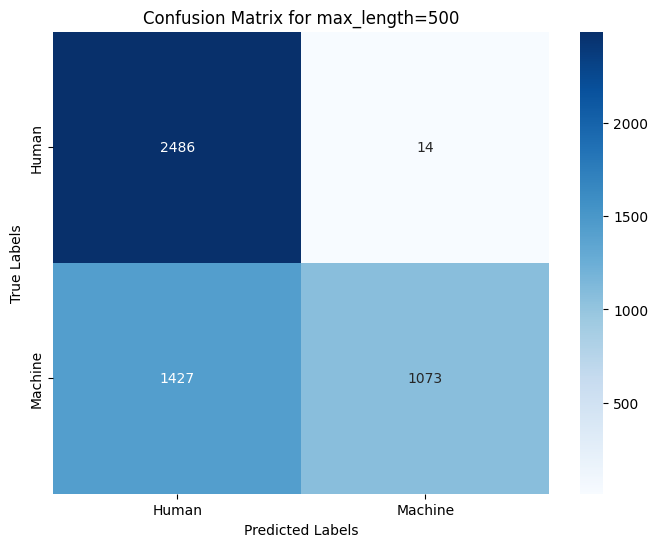

In [ ]:
max_lengths = [10, 20, 50, 100, 200, 500]

for max_length in max_lengths:
    # Tokenize the dataset with the current max_length
    def tokenize_function(examples):
        return tokenizer(examples['text'], padding="max_length", truncation=True, max_length=max_length)

    tokenized_dev_dataset = dev_dataset.map(tokenize_function, batched=True)

    # Prepare the DataLoader
    class Dataset(torch.utils.data.Dataset):
        def __init__(self, encodings, labels):
            self.encodings = encodings
            self.labels = labels

        def __getitem__(self, idx):
            item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
            item['labels'] = torch.tensor(self.labels[idx])
            return item

        def __len__(self):
            return len(self.labels)

    dev_encodings = {'input_ids': tokenized_dev_dataset['test']['input_ids'], 'attention_mask': tokenized_dev_dataset['test']['attention_mask']}
    dev_labels = tokenized_dev_dataset['test']['label']
    dev_dataset_loop = Dataset(dev_encodings, dev_labels)
    dev_loader = DataLoader(dev_dataset_loop, batch_size=32, shuffle=False)

    # Evaluate the model
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()

    true_labels = []
    pred_labels = []

    with torch.no_grad():
        for batch in dev_loader:
            inputs = {k: v.to(device) for k, v in batch.items() if k != 'labels'}
            labels = batch['labels'].to(device)
            outputs = model(**inputs)
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=-1)
            pred_labels.extend(predictions.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(true_labels, pred_labels)
    precision, recall, f1, _ = precision_recall_fscore_support(true_labels, pred_labels, average='binary')

    print(f"Token Limit: {max_length} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

    # Confusion Matrix
    cm = confusion_matrix(true_labels, pred_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Human', 'Machine'], yticklabels=['Human', 'Machine'])
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels')
    plt.title(f'Confusion Matrix for max_length={max_length}')
    plt.show()

# Evaluation by source

In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from datasets import load_dataset
import torch
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the fine-tuned model and tokenizer
model_path = '/content/drive/MyDrive/DeepLearning/Project/RoBERTa'
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaForSequenceClassification.from_pretrained(model_path)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

# Load the dataset
dev_dataset = load_dataset('json', data_files={'test': '/content/SubtaskA/subtaskA_dev_monolingual.jsonl'})


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
sources = dev_dataset['test'].unique('source')
sources

['wikihow', 'wikipedia', 'reddit', 'arxiv', 'peerread']

In [ ]:
# Function to tokenize dataset
def tokenize_function(examples):
    return tokenizer(examples['text'], truncation=True, padding="max_length", max_length=512, return_tensors="pt")

# Function to create a DataLoader
def create_data_loader(dataset):
    dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
    loader = DataLoader(dataset, batch_size=16, shuffle=False)
    return loader


Source: wikihow
Metrics - Accuracy: 0.801, Precision: 0.9934426229508196, Recall: 0.606, F1-Score: 0.7527950310559006


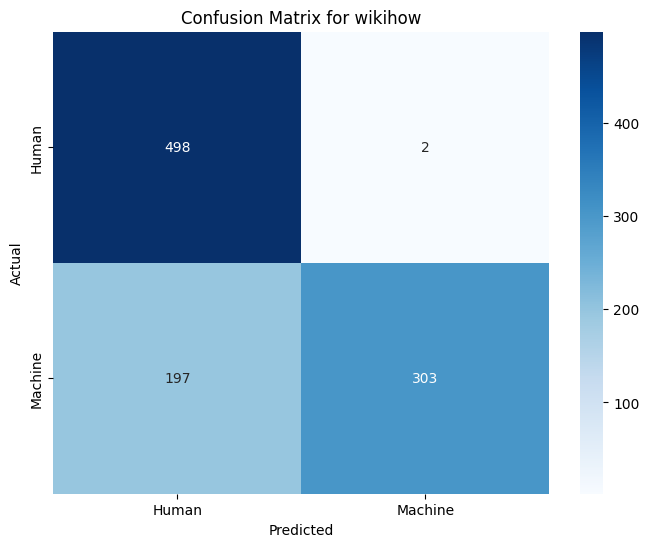

Filter:   0%|          | 0/5000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Source: wikipedia
Metrics - Accuracy: 0.715, Precision: 1.0, Recall: 0.43, F1-Score: 0.6013986013986015


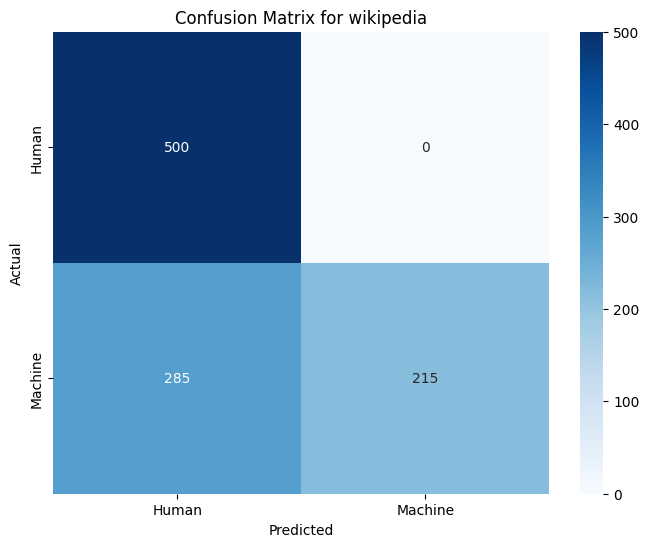

Filter:   0%|          | 0/5000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Source: reddit
Metrics - Accuracy: 0.599, Precision: 0.9714285714285714, Recall: 0.204, F1-Score: 0.3371900826446281


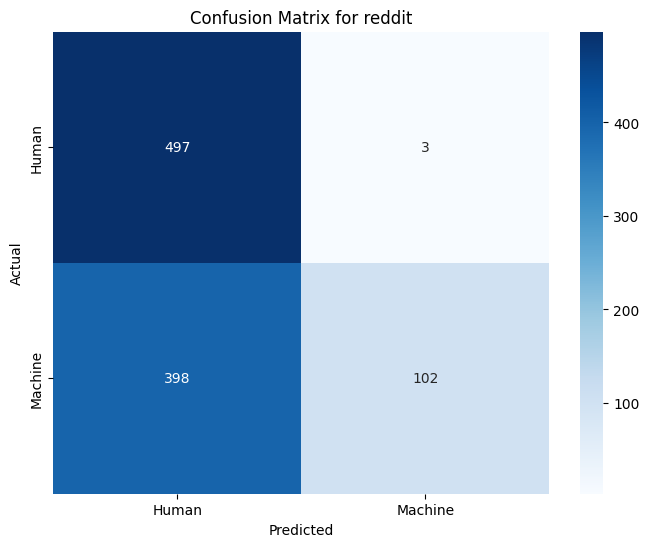

Filter:   0%|          | 0/5000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Source: arxiv
Metrics - Accuracy: 0.938, Precision: 1.0, Recall: 0.876, F1-Score: 0.933901918976546


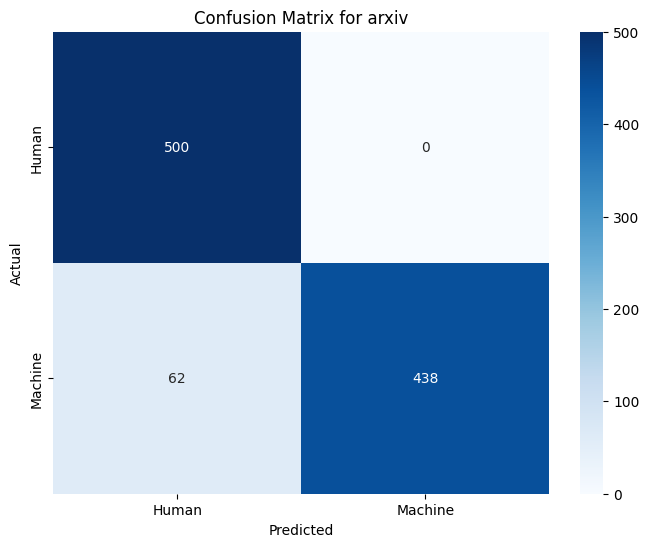

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Source: peerread
Metrics - Accuracy: 0.507, Precision: 0.6521739130434783, Recall: 0.03, F1-Score: 0.05736137667304014


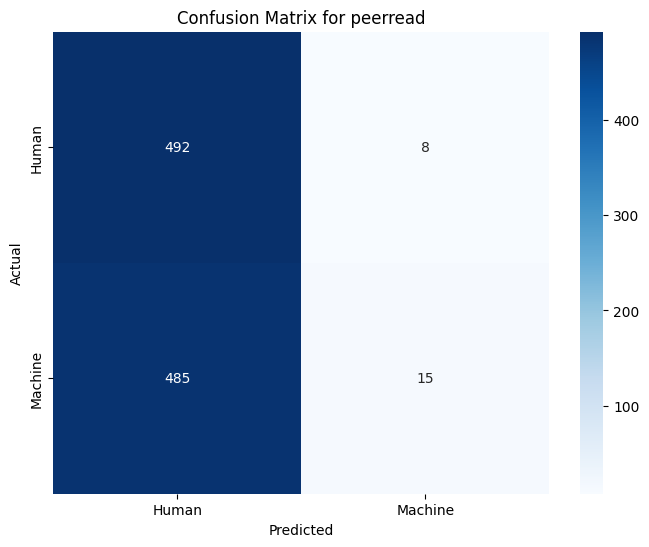

In [ ]:

# Evaluate model on each source
# Evaluate the model for each source
for source in sources:
    # Filter and tokenize the dataset by source
    source_dataset = dev_dataset['test'].filter(lambda example: example['source'] == source)

    tokenized_dataset = source_dataset.map(tokenize_function, batched=True)

    # Create DataLoader
    loader = create_data_loader(tokenized_dataset)

    true_labels, pred_labels = [], []
    with torch.no_grad():
        for batch in loader:
            inputs = {k: v.to(device) for k, v in batch.items() if k != 'label'}  # Exclude 'labels' from inputs
            labels = batch['label'].to(device)  # Correctly access labels
            outputs = model(**inputs)
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=-1)
            pred_labels.extend(predictions.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())


    # Calculate and print metrics
    accuracy = accuracy_score(true_labels, pred_labels)
    precision, recall, f1, _ = precision_recall_fscore_support(true_labels, pred_labels, average='binary')
    cm = confusion_matrix(true_labels, pred_labels)

    print(f"Source: {source}")
    print(f"Metrics - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Human', 'Machine'], yticklabels=['Human', 'Machine'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix for {source}')
    plt.show()
